<a href="https://colab.research.google.com/github/TejaKarthiSri/IVA-Assignment/blob/main/IVA_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Detection with OpenCV**

● **Detect simple objects like faces, eyes, or hands using
OpenCV and Haar cascades**

● **Libraries: OpenCV, NumPy**

In [ ]:
!pip install opencv-python

Saving image5.webp to image5.webp


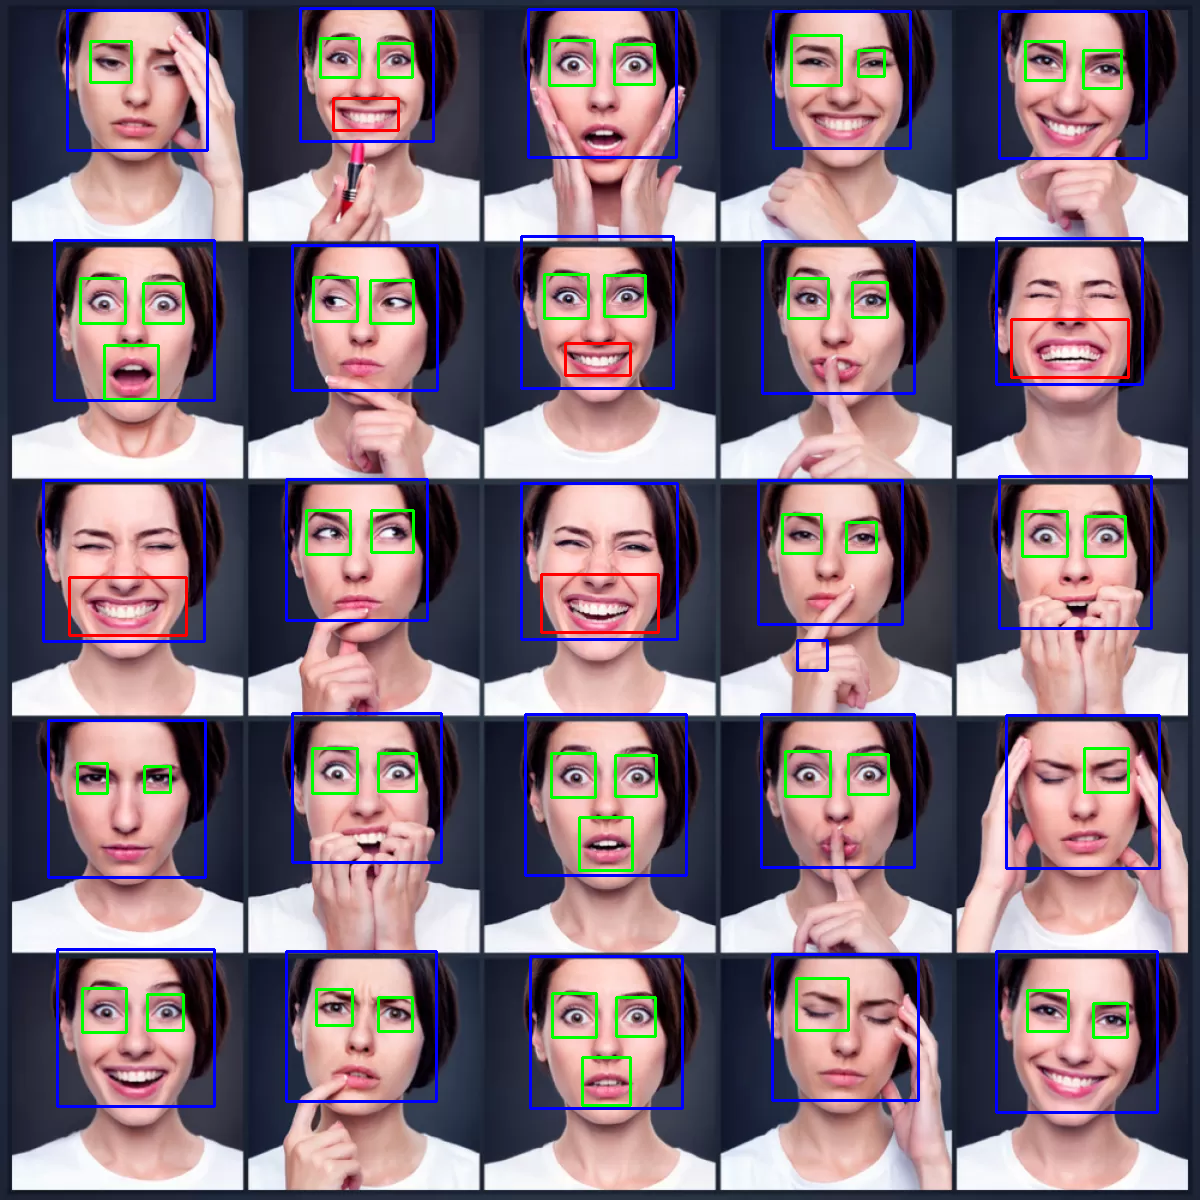

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload an image
uploaded = files.upload()

# Load Haar Cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Load the image
image = cv2.imread(list(uploaded.keys())[0])
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue for faces

    # Region of interest for detecting eyes and smile
    roi_gray = gray_image[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]

    # Detect eyes within the face
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # Green for eyes

    # Detect smile within the face
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20)
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)  # Red for smile

# Display the result
cv2_imshow(image)
